### Integrantes
    Wilmer Alexander Panqueva Caballero - 20222678006
    Julieth Alejandra Páez Camargo - 20222678004

### Conjunto de datos
    Dataset: https://www.kaggle.com/datasets/rabieelkharoua/predict-liver-disease-1700-records-datasetE

El Dataset entregado presenta los datos de pacientes que presentan afectaciones en el hígado.La idea es analizar cuáles son las causas para que un paciente tenga afectaciones de salud poresta enfermedad.
        
        Se debe realizar lo siguiente:

        1. Preprocesamiento de los datos: limpieza, revisión de datos faltantes/anómalos, reducción de datos (seleccionar características relevantes) y transformaciones.
        2. Análisis exploratorio (EDA) de los datos para responder al problema: ¿Qué características hacen que se afecte la salud del hígado?
        3. Visualización de datos, debe entregar un informe para concluir el análisis exploratorio

## Desarrollo

### Problema a resolver: ¿Qué características hacen que se afecte la salud del hígado?

### Preprocesamiento de los datos

#### Importamos las librerias necesarias para todo el manejo de datos

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Importamos el Dataset a utilizar

In [24]:
dataSet = pd.read_csv("Liver_disease_data.csv")
#Creamos un Data frame usando pandas
df_higado = pd.DataFrame(dataSet)

#### Descripción de las columnas según el propio DataSet

    Age: Rango: 20 a 80 Años.
    Gender: Masculino (0) or Femenino (1).
    BMI (Índice de masa corporal): Rango: entre 15 a 40.
    Alcohol Consumption: Rango: 0 a 20 unidades por semana.
    Smoking: No (0) o Si (1).
    Genetic Risk: Bajo (0), Medio (1), Alto (2).
    Physical Activity: Rango: 0 a 10 hora por semana.
    Diabetes: No (0) o Si (1).
    Hypertension: No (0) o Si (1).
    Liver Function Test: Rango: 20 a 100.
    Diagnosis: Indicador binario (0 o 1) de la presencia de enfermedad hepática.

#### Revisamos información relevante

In [25]:
df_higado

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1
...,...,...,...,...,...,...,...,...,...,...,...
1695,42,0,38.498295,14.384688,0,1,0.992289,0,0,97.933961,1
1696,40,0,27.600094,5.431009,0,0,8.390492,0,0,70.260528,1
1697,38,0,38.730017,6.324302,1,2,9.314222,0,1,56.053370,1
1698,67,0,35.820798,16.899417,0,2,3.224453,0,0,26.300875,1


In [26]:
print("Cantidad de filas y columnas")
print(df_higado.shape)
print("\n Información general")
print(df_higado.info())
df_higado

Cantidad de filas y columnas
(1700, 11)

 Información general
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB
None


,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1
...,...,...,...,...,...,...,...,...,...,...,...
1695,42,0,38.498295,14.384688,0,1,0.992289,0,0,97.933961,1
1696,40,0,27.600094,5.431009,0,0,8.390492,0,0,70.260528,1
1697,38,0,38.730017,6.324302,1,2,9.314222,0,1,56.053370,1
1698,67,0,35.820798,16.899417,0,2,3.224453,0,0,26.300875,1


#### Verificamos valores Duplicado

In [27]:
print([x for x in df_higado.duplicated() if x == True] , '\n\n')
df_higado.duplicated().sum()

[] 




np.int64(0)

#### Verificamos datos no numericos y datos null o faltantes

In [28]:
print(df_higado.isna().sum())
print("\n")
print(df_higado.isnull().mean() * 100 )
print("\n")

Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64


Age                   0.0
Gender                0.0
BMI                   0.0
AlcoholConsumption    0.0
Smoking               0.0
GeneticRisk           0.0
PhysicalActivity      0.0
Diabetes              0.0
Hypertension          0.0
LiverFunctionTest     0.0
Diagnosis             0.0
dtype: float64




In [29]:
print(df_higado.isnull().all())
print("\n")
print(df_higado.isnull().all(axis = 1))

Age                   False
Gender                False
BMI                   False
AlcoholConsumption    False
Smoking               False
GeneticRisk           False
PhysicalActivity      False
Diabetes              False
Hypertension          False
LiverFunctionTest     False
Diagnosis             False
dtype: bool


0       False
1       False
2       False
3       False
4       False
        ...  
1695    False
1696    False
1697    False
1698    False
1699    False
Length: 1700, dtype: bool


In [28]:
df_higado

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1
...,...,...,...,...,...,...,...,...,...,...,...
1695,42,0,38.498295,14.384688,0,1,0.992289,0,0,97.933961,1
1696,40,0,27.600094,5.431009,0,0,8.390492,0,0,70.260528,1
1697,38,0,38.730017,6.324302,1,2,9.314222,0,1,56.053370,1
1698,67,0,35.820798,16.899417,0,2,3.224453,0,0,26.300875,1


#### Comprobamos los valores únicos en cada columna para identificar posibles anomalías

In [29]:
unique_values = df_higado.nunique()
unique_values

Age                     61
Gender                   2
BMI                   1700
AlcoholConsumption    1700
Smoking                  2
GeneticRisk              3
PhysicalActivity      1700
Diabetes                 2
Hypertension             2
LiverFunctionTest     1700
Diagnosis                2
dtype: int64

#### Descripción estadística de las variables numéricas

In [30]:
df_higado.describe()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,50.394118,0.504118,27.699801,9.832309,0.291765,0.521765,5.000993,0.142353,0.154706,59.863867,0.550588
std,17.641915,0.500130,7.210400,5.757472,0.454708,0.666262,2.847074,0.349515,0.361730,22.996262,0.497581
min,20.000000,0.000000,15.004710,0.003731,0.000000,0.000000,0.001852,0.000000,0.000000,20.019254,0.000000
25%,35.000000,0.000000,21.455414,4.841811,0.000000,0.000000,2.622121,0.000000,0.000000,40.024216,0.000000
50%,51.000000,1.000000,27.925367,9.828195,0.000000,0.000000,5.022883,0.000000,0.000000,59.513146,1.000000
75%,66.000000,1.000000,33.957668,14.871671,1.000000,1.000000,7.401642,0.000000,0.000000,79.428755,1.000000
max,80.000000,1.000000,39.992845,19.952456,1.000000,2.000000,9.994964,1.000000,1.000000,99.991413,1.000000


#### Validamos la existencia de Outliers

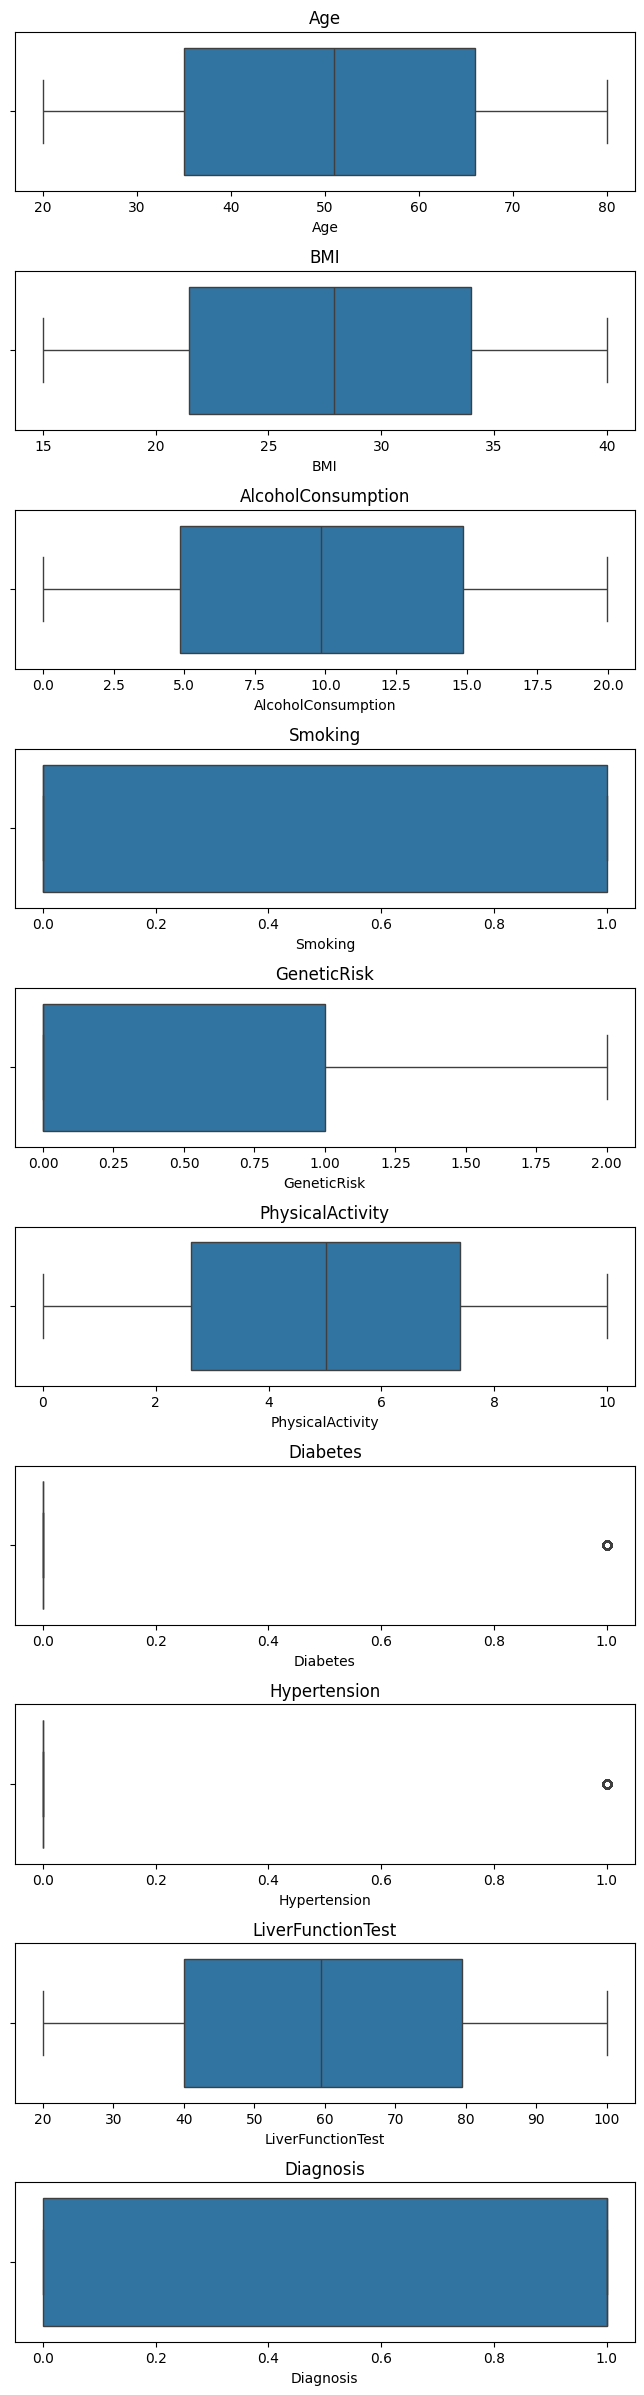

In [14]:
cols_num = ['Age','BMI', 'AlcoholConsumption','Smoking',	'GeneticRisk',	'PhysicalActivity',	'Diabetes',	'Hypertension',	'LiverFunctionTest',	'Diagnosis']

fig, ax = plt.subplots(nrows=10,ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df_higado, ax=ax[i])
    ax[i].set_title(col)

#### Normalizamos columnas BMI, AlcoholConsumption, PhysicalActivity, LiverFunctionTest, debido a que tienen valores muy amplios para trabajar

In [4]:
scaler = MinMaxScaler()
scaled_columns = ['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'LiverFunctionTest']
df_higado[scaled_columns] = scaler.fit_transform(df_higado[scaled_columns])

In [32]:
df_higado

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,0.834511,0.865674,0,1,0.065754,0,0,0.284036,1
1,71,1,0.629409,0.110159,0,1,0.166986,1,0,0.591338,1
2,48,0,0.198762,0.927238,0,0,0.993330,0,0,0.546687,0
3,34,1,0.064459,0.633080,0,0,0.563216,0,0,0.556902,1
4,62,1,0.042465,0.054344,0,1,0.356682,1,0,0.723370,1
...,...,...,...,...,...,...,...,...,...,...,...
1695,42,0,0.940190,0.720896,0,1,0.099112,0,0,0.974273,1
1696,40,0,0.504055,0.272061,0,0,0.839442,0,0,0.628235,1
1697,38,0,0.949463,0.316841,1,2,0.931879,0,1,0.450583,1
1698,67,0,0.833039,0.846956,0,2,0.322482,0,0,0.078548,1


### Seleccionamos caracteristicas relevantes

In [5]:
corr_matrix = df_higado.corr()

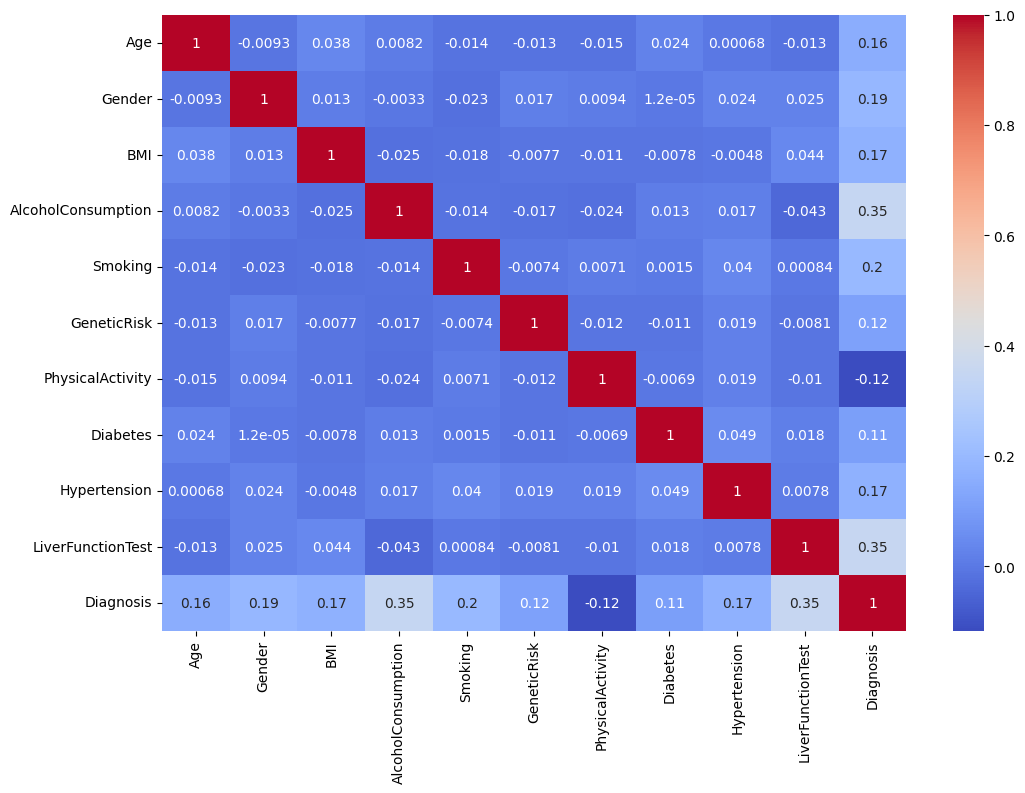

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [7]:

X = df_higado.drop('Diagnosis', axis=1)
y = df_higado['Diagnosis']

# Inicializar y entrenar el modelo
model = RandomForestClassifier()
model.fit(X, y)

# Obtener la importancia de las características
importances = model.feature_importances_

# Crear un DataFrame con la importancia de las características
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
# Visualizamos la importancia de las caracteristicas
print(feature_importances)

                    Importance
LiverFunctionTest     0.250319
AlcoholConsumption    0.239639
BMI                   0.113217
Age                   0.108872
PhysicalActivity      0.098511
GeneticRisk           0.052807
Gender                0.044233
Smoking               0.043479
Hypertension          0.030255
Diabetes              0.018668


####  Basado en la matriz de correlación y el método de la importancia de características; Seleccionamos las caracteristicas mas relevantes que dan solución a nuestro problema:

     LiverFunctionTest, AlcoholConsumption, BMI, Age

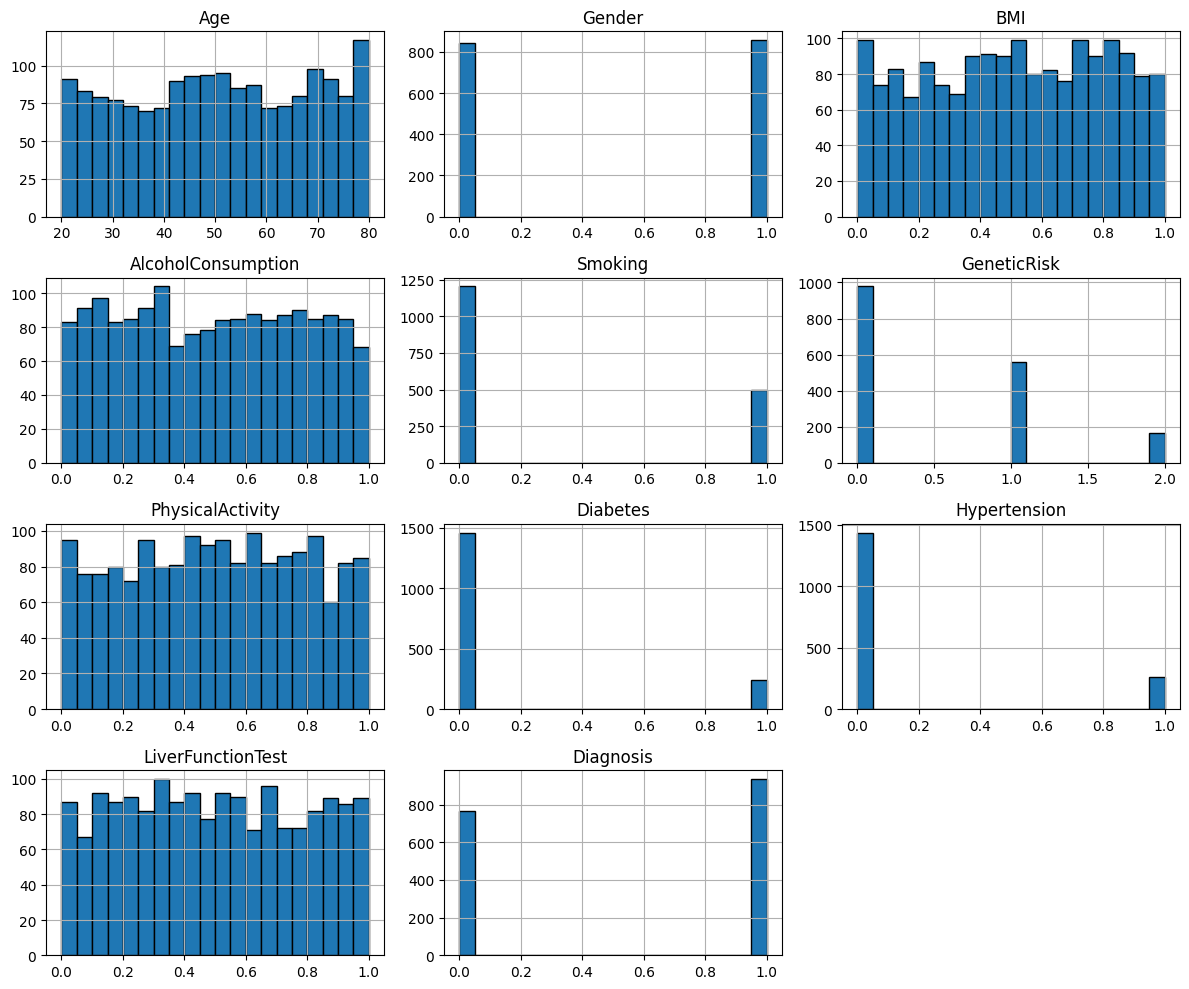

In [8]:
df_higado.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

#### Borramos las columnas que no utilizaremos para la visualización de datos

In [10]:
df_higado = df_higado.drop(columns=['GeneticRisk', 'PhysicalActivity'])

In [15]:
df_higado['Diagnosis_category'] = df_higado['Diagnosis'].map({1: 'Yes', 0: 'No'})

In [16]:
df_higado

,Age,BMI,AlcoholConsumption,Smoking,Diabetes,Hypertension,LiverFunctionTest,Diagnosis,Diagnosis_category
0,58,0.834511,0.865674,0,0,0,0.284036,1,Yes
1,71,0.629409,0.110159,0,1,0,0.591338,1,Yes
2,48,0.198762,0.927238,0,0,0,0.546687,0,No
3,34,0.064459,0.633080,0,0,0,0.556902,1,Yes
4,62,0.042465,0.054344,0,1,0,0.723370,1,Yes
...,...,...,...,...,...,...,...,...,...
1695,42,0.940190,0.720896,0,0,0,0.974273,1,Yes
1696,40,0.504055,0.272061,0,0,0,0.628235,1,Yes
1697,38,0.949463,0.316841,1,0,1,0.450583,1,Yes
1698,67,0.833039,0.846956,0,0,0,0.078548,1,Yes


### EDA

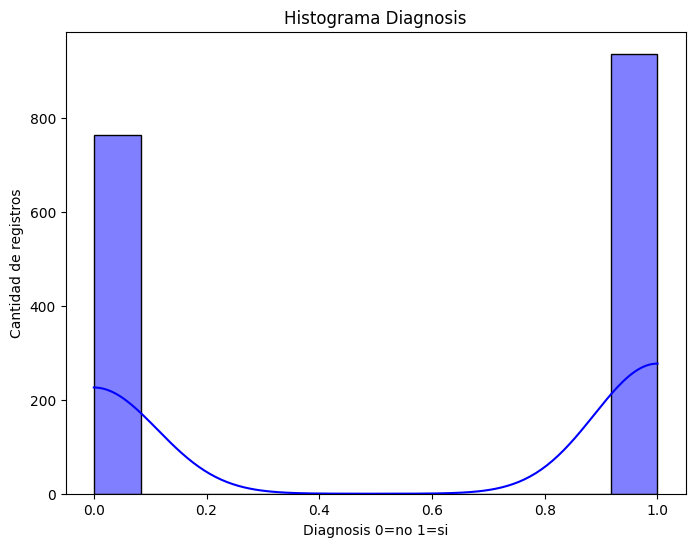

In [21]:
# Crea Histograma de la variable objetivo 'Diagnosis'
plt.figure(figsize=(8, 6))
sns.histplot(df_higado['Diagnosis'], kde=True, color='blue')
plt.title(f"Histograma Diagnosis")
plt.xlabel('Diagnosis 0=no 1=si')
plt.ylabel('Cantidad de registros')
plt.show()

In [35]:
#Se crea un DataFrame con las columnas que necesitamos, edad, genero y Diagnosttico
df_n = df_higado[['Age','Gender','Diagnosis']]
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        1700 non-null   int64
 1   Gender     1700 non-null   int64
 2   Diagnosis  1700 non-null   int64
dtypes: int64(3)
memory usage: 40.0 KB


In [36]:
#Se agrupa el DataFrame por 'Gender' y 'Age', se calcula la suma de 'Diagnostico' para cada grupo y se crea un nuevo DataFrame con los resultados.
df_agg = df_n.groupby(['Gender','Age']).agg(
                                    {
                                        'Diagnosis': 'sum',
                                    }
                                ).reset_index()

#Se muestran las últimas filas del DataFrame para verificar los resultados.
df_agg.tail()

,Gender,Age,Diagnosis
117,1,76,17
118,1,77,16
119,1,78,10
120,1,79,11
121,1,80,10


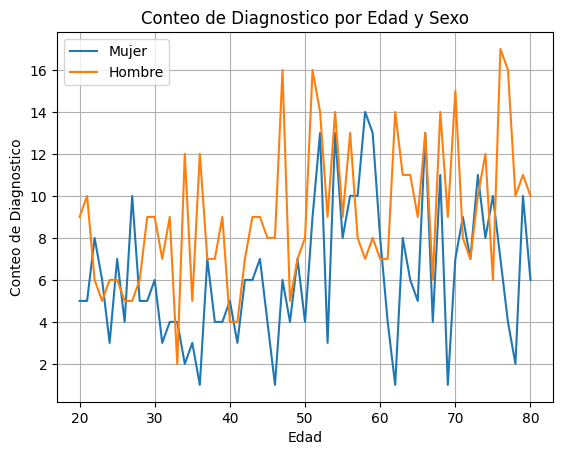

In [46]:
##Grafico de Lineas Genero, Edad y Diagnostico

# Separar datos por Genero
female_data = df_agg[df_agg['Gender'] == 0]
male_data = df_agg[df_agg['Gender'] == 1]

# Extraer la edad y el conteo de Diagnostico para cada grupo de genero.
female_age = female_data['Age']
female_diagnosis = female_data['Diagnosis']
male_age = male_data['Age']
male_diagnosis = male_data['Diagnosis']

# Crea el gráfico de líneas
plt.plot(female_age, female_diagnosis, label='Mujer')
plt.plot(male_age, male_diagnosis, label='Hombre')

# Personalización del gráfico
plt.xlabel('Edad')
plt.ylabel('Conteo de Diagnostico')
plt.title('Conteo de Diagnostico por Edad y Sexo')
plt.legend()

# Mostrar Grafica
plt.grid(True)  
plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_3220\2334921859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='LiverFunctionTest', data=df_higado, palette="Set3")


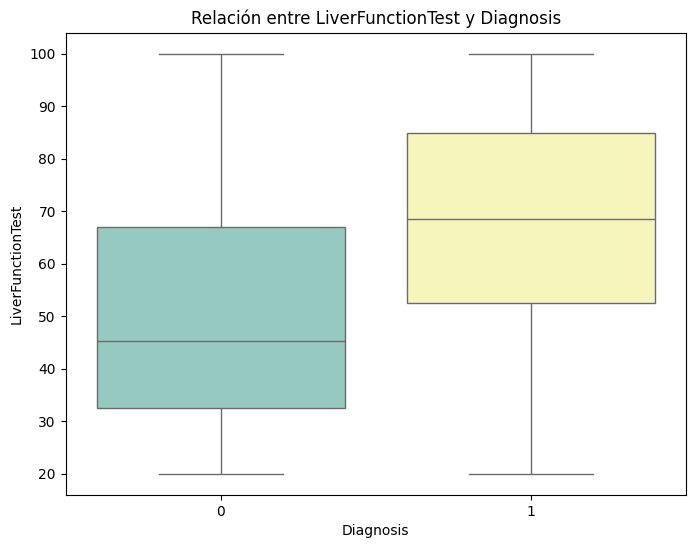

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Diagnosis', y='LiverFunctionTest', data=df_higado, palette="Set3")
plt.title('Relación entre LiverFunctionTest y Diagnosis')
plt.show()

#### Visualizamos la importancia de cada una de las caracteristicas para corroborar nuestra matriz de correlación

C:\Users\steve\AppData\Local\Temp\ipykernel_3220\1296673912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.index, y=feature_importances['Importance'], palette="Set2")


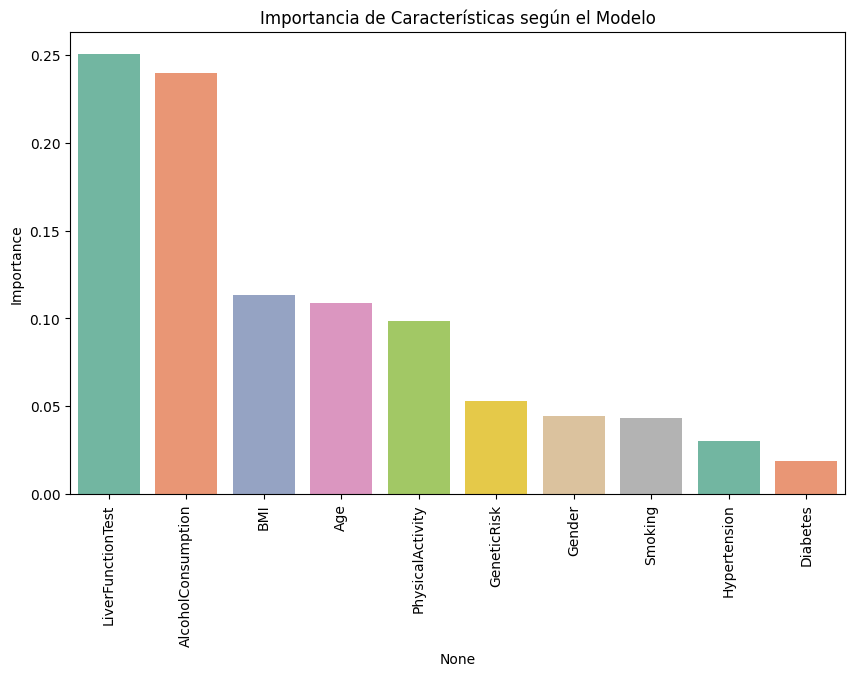

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'], palette="Set2")
plt.title('Importancia de Características según el Modelo')
plt.xticks(rotation=90)
plt.show()

#### Visualizamos la relación entre consumo de alcohol y el diagnostico

C:\Users\steve\AppData\Local\Temp\ipykernel_3220\947134843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='AlcoholConsumption', data=df_higado, palette="Set3")


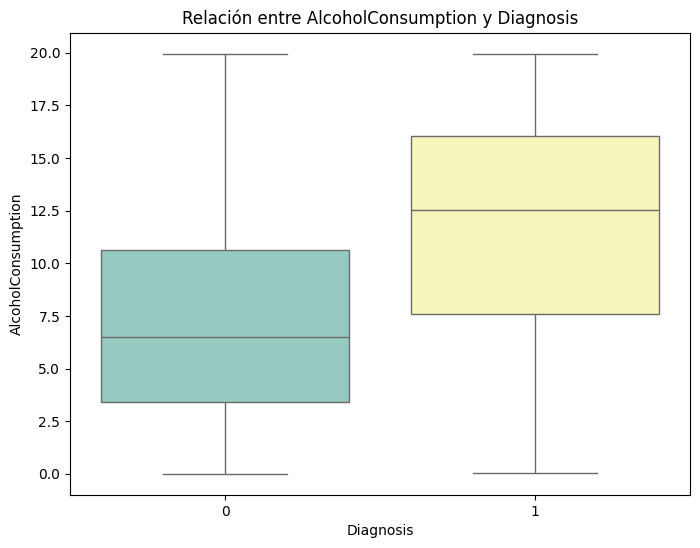

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Diagnosis', y='AlcoholConsumption', data=df_higado, palette="Set3")
plt.title('Relación entre AlcoholConsumption y Diagnosis')
plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_3220\1992283616.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df_higado, palette='Set2')


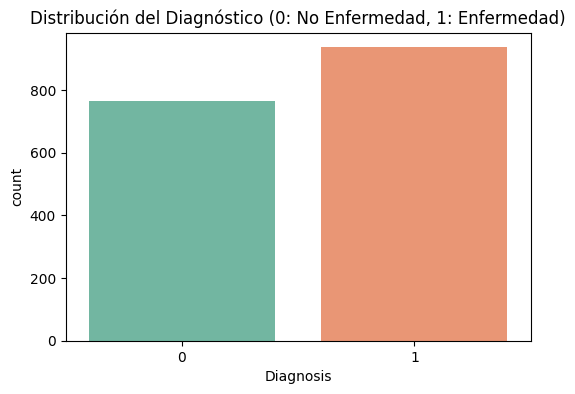

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df_higado, palette='Set2')
plt.title('Distribución del Diagnóstico (0: No Enfermedad, 1: Enfermedad)')
plt.show()

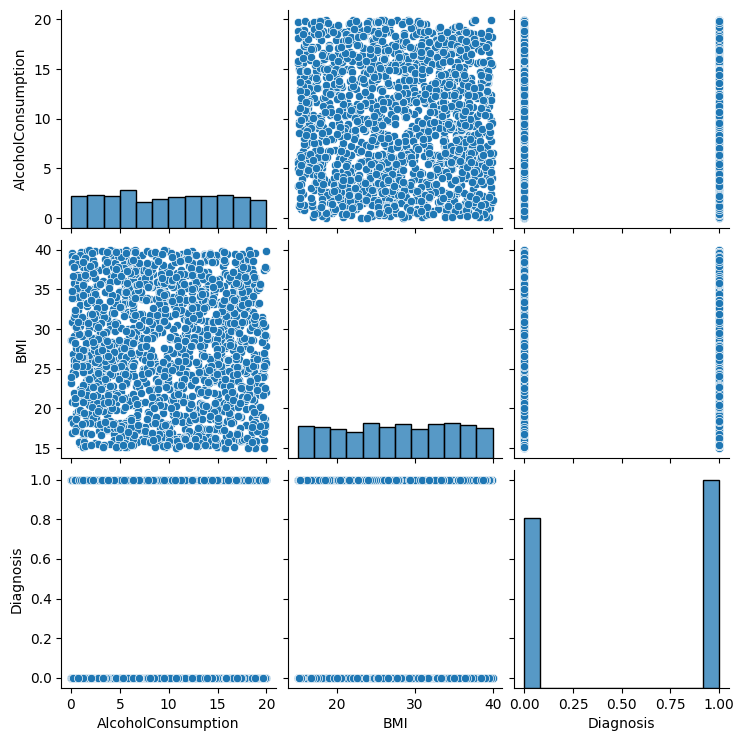

In [51]:
sns.pairplot(df_higado[['AlcoholConsumption', 'BMI', 'Diagnosis']]) 
plt.show()

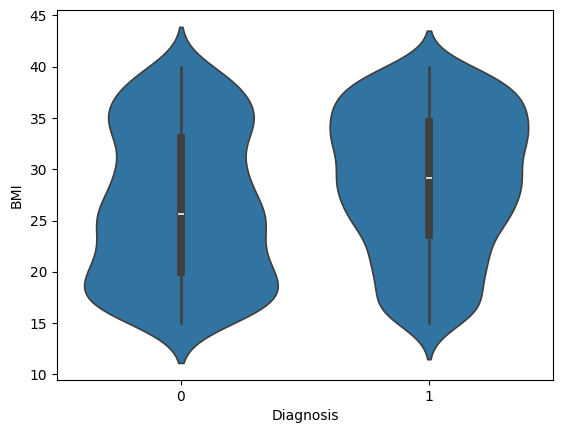

In [49]:
sns.violinplot(x='Diagnosis', y='BMI', data=df_higado)  
plt.show()

### Conclusiones

1. Tests de función Hepática: Apartir del analisis del conjunto de datos se obtiene que la caracteristica mas importante es "LiverFunctionTest" pues determina algún tipo de problema en el higado lo cual responde directamente al problema planteado haciendo uso de las demas variables que logran dar contexto.

2. Genero Como factor: Aunque no es una de las caracteristicas principales de los problemas hepaticos se tiene como evidencia que el genero masculino es un factor a tener en cuenta, en la detección de enfermedades.

3. Edad como factor: Se evidencia que la edad es un factor importante, sugiriendo que las enfermedades hepaticas se presentan con mayor frecuencia apartir de los 45 años de edad aproximadamente.

4. Caracteristicas principales: A partir del analisis del conjunto de datos se logra concluir que los principales factores que afectan el higado son: * El consumo de alcohol, el Índice de masa corporal, la edad y el genero.

5. Las características como LiverFunctionTest y AlcoholConsumption son las más importantes para predecir problemas hepáticos. Por lo tanto, cualquier intervención o recomendación médica debe centrarse en monitorear y controlar estos factores.

6. Aunque la diabetes está relacionada con problemas metabólicos, su impacto directo sobre la salud del hígado, según el modelo, es menor en comparación con otros factores. Sin embargo, la diabetes tipo 2 está asociada con el hígado graso no alcohólico, por lo que sigue siendo un factor relevante, pero menos importante.